In [ ]:
"""
# PPMI Data Exploration & Analysis

This notebook provides comprehensive exploration and analysis of the PPMI dataset.
"""

In [28]:
# Cell 1: Imports and Setup
import sys
from pathlib import Path
sys.path.append(str(Path.cwd().parent / 'src'))

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

In [30]:
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)

In [31]:
print("Libraries imported successfully!")

Libraries imported successfully!


In [32]:
# Cell 2: Load PPMI Data
import os
from data.ppmi_custom_loader import load_ppmi_data

# Change to the main project directory to find the data
# Look for PPMI_Data folders in parent directories
current_dir = Path.cwd()
project_root = current_dir
for _ in range(3):  # Look up to 3 levels up
    if (current_dir / 'PPMI_Data 1').exists() or (current_dir / 'PPMI_Data 2').exists():
        project_root = current_dir
        break
    current_dir = current_dir.parent

os.chdir(project_root)
print(f"Changed working directory to: {os.getcwd()}")
print(f"PPMI_Data 1 exists: {(project_root / 'PPMI_Data 1').exists()}")
print(f"PPMI_Data 2 exists: {(project_root / 'PPMI_Data 2').exists()}")

Changed working directory to: /Users/Arnav/Documents/BTP/PPMI
PPMI_Data 1 exists: True
PPMI_Data 2 exists: True


In [33]:
print("Loading PPMI data...")
mapping_df, summary = load_ppmi_data()

INFO:data.ppmi_custom_loader:Creating image-to-patient mapping...
INFO:data.ppmi_custom_loader:Searching for DICOM files in PPMI_Data 1
INFO:data.ppmi_custom_loader:Searching for DICOM files in PPMI_Data 2
INFO:data.ppmi_custom_loader:Found 19 DICOM files
INFO:data.ppmi_custom_loader:Created mapping for 19 images
INFO:data.ppmi_custom_loader:Unique patients: 7
INFO:data.ppmi_custom_loader:Merging with clinical data...
INFO:data.ppmi_custom_loader:Loading PPMI clinical data...
INFO:data.ppmi_custom_loader:Loading idaSearch_9_03_2025.csv
INFO:data.ppmi_custom_loader:Loaded idaSearch: (3979, 4)
INFO:data.ppmi_custom_loader:Loading DaTscan_Imaging_03Sep2025.csv
INFO:data.ppmi_custom_loader:Loaded DaTscan imaging: (12581, 17)
INFO:data.ppmi_custom_loader:Final merged dataset: 313 images
INFO:data.ppmi_custom_loader:Saved image mapping to data/metadata/ppmi_image_mapping.csv
INFO:data.ppmi_custom_loader:Saved dataset summary to data/metadata/ppmi_dataset_summary.txt


Loading PPMI data...


In [34]:
print(f"\nDataset loaded: {summary['total_images']} images from {summary['unique_patients']} patients")
print(f"\nData folder distribution:")
for folder, count in summary['data_folders'].items():
    print(f"  {folder}: {count} images")


Dataset loaded: 313 images from 7 patients

Data folder distribution:
  PPMI_Data 2: 253 images
  PPMI_Data 1: 60 images


In [35]:
mapping_df.head()

,patient_id,file_path,filename,data_folder,patient_id_from_filename,modality,acquisition_info,sex,age,description,EVENT_ID,INFODT,image_type
0,100001,PPMI_Data 1/100001/Reconstructed_DaTSCAN/2024-...,PPMI_100001_NM_AC-018100001-4-DAT-G6N1__br_raw...,PPMI_Data 1,100001,NM,AC-018100001-4-DAT-G6N1,M,67.3,Reconstructed DaTSCAN <- DaT Brain Tomo,SC,09/2020,spect
1,100001,PPMI_Data 1/100001/Reconstructed_DaTSCAN/2024-...,PPMI_100001_NM_AC-018100001-4-DAT-G6N1__br_raw...,PPMI_Data 1,100001,NM,AC-018100001-4-DAT-G6N1,M,67.3,Reconstructed DaTSCAN <- DaT Brain Tomo,V02,04/2021,spect
2,100001,PPMI_Data 1/100001/Reconstructed_DaTSCAN/2024-...,PPMI_100001_NM_AC-018100001-4-DAT-G6N1__br_raw...,PPMI_Data 1,100001,NM,AC-018100001-4-DAT-G6N1,M,67.3,Reconstructed DaTSCAN <- DaT Brain Tomo,V04,12/2021,spect
3,100001,PPMI_Data 1/100001/Reconstructed_DaTSCAN/2024-...,PPMI_100001_NM_AC-018100001-4-DAT-G6N1__br_raw...,PPMI_Data 1,100001,NM,AC-018100001-4-DAT-G6N1,M,67.3,Reconstructed DaTSCAN <- DaT Brain Tomo,V05,04/2022,spect
4,100001,PPMI_Data 1/100001/Reconstructed_DaTSCAN/2024-...,PPMI_100001_NM_AC-018100001-4-DAT-G6N1__br_raw...,PPMI_Data 1,100001,NM,AC-018100001-4-DAT-G6N1,M,67.3,Reconstructed DaTSCAN <- DaT Brain Tomo,V06,11/2022,spect


In [36]:
# Cell 3: Data Overview & Visualization
# Basic dataset statistics
print("Dataset Overview:")
print(f"Shape: {mapping_df.shape}")
print(f"Columns: {list(mapping_df.columns)}")
print(f"\nMissing values:")
print(mapping_df.isnull().sum())

Dataset Overview:
Shape: (313, 13)
Columns: ['patient_id', 'file_path', 'filename', 'data_folder', 'patient_id_from_filename', 'modality', 'acquisition_info', 'sex', 'age', 'description', 'EVENT_ID', 'INFODT', 'image_type']

Missing values:
patient_id                  0
file_path                   0
filename                    0
data_folder                 0
patient_id_from_filename    0
modality                    0
acquisition_info            0
sex                         0
age                         0
description                 0
EVENT_ID                    0
INFODT                      0
image_type                  0
dtype: int64


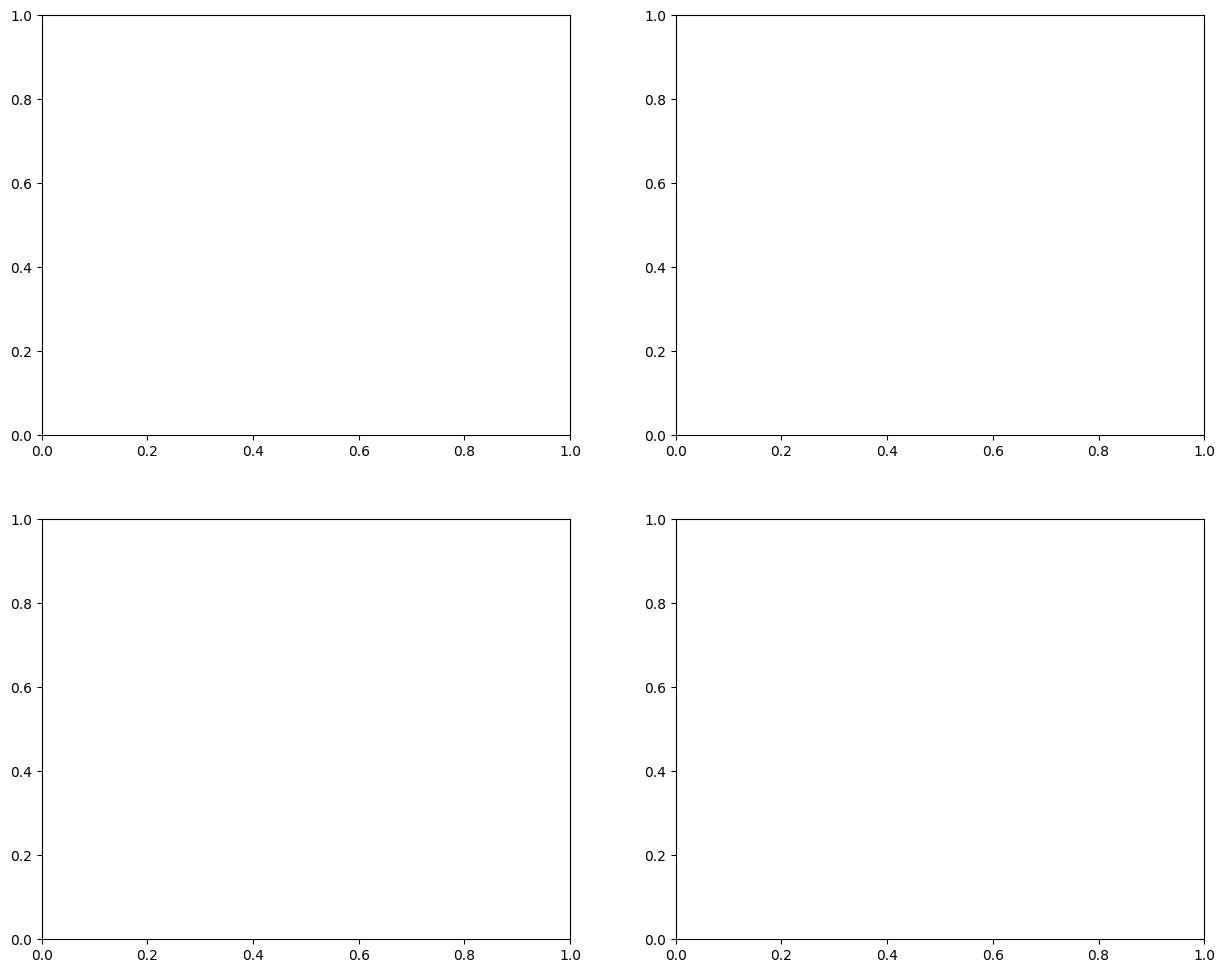

In [37]:
# Visualize data distribution
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

In [38]:
# Data folder distribution
axes[0,0].pie(summary['data_folders'].values(), labels=summary['data_folders'].keys(), autopct='%1.1f%%')
axes[0,0].set_title('Images by Data Folder')

Text(0.5, 1.0, 'Images by Data Folder')

In [39]:
# Patient distribution
patient_counts = mapping_df['patient_id'].value_counts()
axes[0,1].hist(patient_counts.values, bins=20, alpha=0.7, edgecolor='black')
axes[0,1].set_title('Images per Patient Distribution')
axes[0,1].set_xlabel('Number of Images')
axes[0,1].set_ylabel('Number of Patients')

Text(638.5353535353535, 0.5, 'Number of Patients')

In [40]:
# Sex distribution (if available)
if 'sex' in mapping_df.columns:
    sex_counts = mapping_df['sex'].value_counts()
    axes[1,0].bar(sex_counts.index, sex_counts.values, alpha=0.7)
    axes[1,0].set_title('Sex Distribution')
    axes[1,0].set_ylabel('Number of Images')

In [41]:
# Age distribution (if available)
if 'age' in mapping_df.columns:
    age_data = pd.to_numeric(mapping_df['age'], errors='coerce').dropna()
    if len(age_data) > 0:
        axes[1,1].hist(age_data, bins=20, alpha=0.7, edgecolor='black')
        axes[1,1].set_title('Age Distribution')
        axes[1,1].set_xlabel('Age (years)')
        axes[1,1].set_ylabel('Number of Images')

In [42]:
plt.tight_layout()
plt.show()

<Figure size 1200x800 with 0 Axes>

In [43]:
# Cell 4: DICOM Image Exploration
from data.dicom_loader import DICOMLoader
import pydicom

In [44]:
# Load a sample DICOM file
sample_file = mapping_df.iloc[0]['file_path']
print(f"Loading sample DICOM: {sample_file}")

Loading sample DICOM: PPMI_Data 1/100001/Reconstructed_DaTSCAN/2024-09-11_15_13_41.0/I10960001/PPMI_100001_NM_AC-018100001-4-DAT-G6N1__br_raw_20240926190052673_1.dcm



DICOM metadata:
Patient ID: 100001
Modality: NM
Image size: 109 x 91
Pixel spacing: N/A
Slice thickness: N/A


TypeError: Invalid shape (91, 109, 91) for image data

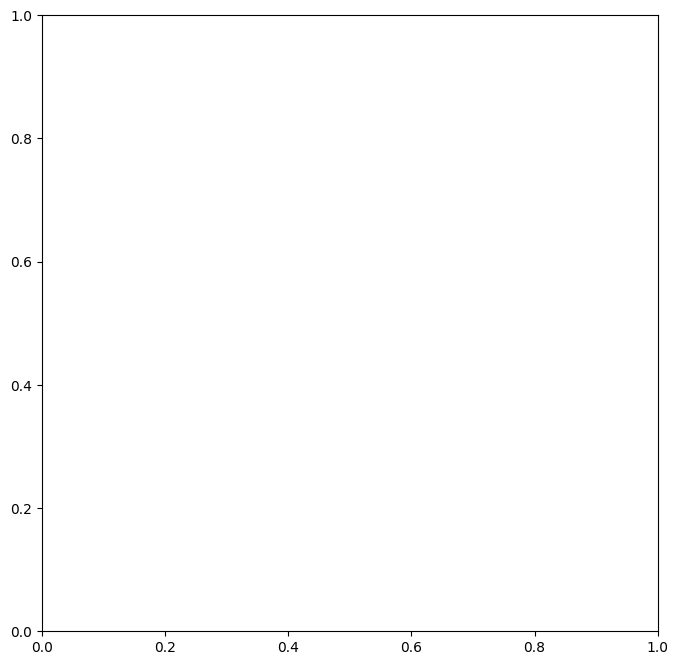

In [46]:

ds = pydicom.dcmread(sample_file)
print(f"\nDICOM metadata:")
print(f"Patient ID: {getattr(ds, 'PatientID', 'N/A')}")
print(f"Modality: {getattr(ds, 'Modality', 'N/A')}")
print(f"Image size: {getattr(ds, 'Rows', 'N/A')} x {getattr(ds, 'Columns', 'N/A')}")
print(f"Pixel spacing: {getattr(ds, 'PixelSpacing', 'N/A')}")
print(f"Slice thickness: {getattr(ds, 'SliceThickness', 'N/A')}")

# Display image
plt.figure(figsize=(10, 8))
plt.imshow(ds.pixel_array, cmap='hot')
plt.title(f'SPECT Image - Patient {ds.PatientID if hasattr(ds, "PatientID") else "Unknown"}')
plt.colorbar(label='Intensity')
plt.show()

In [ ]:
except Exception as e:
    print(f"Error loading DICOM: {e}")

In [ ]:
# Cell 5: SBR Feature Calculation & Baseline
from features.simple_sbr_calculator import SimpleSBRCalculator

In [ ]:
# Initialize simplified SBR calculator
sbr_calculator = SimpleSBRCalculator()

In [ ]:
# Calculate SBR features for a subset
sample_size = min(20, len(mapping_df))
sample_mapping = mapping_df.sample(n=sample_size, random_state=42)

In [ ]:
print(f"Calculating SBR features for {sample_size} sample images...")
sample_features = sbr_calculator.calculate_sbr_dataset(sample_mapping)

In [ ]:
print(f"\nSBR features calculated: {len(sample_features.columns) - 4} features")
print(f"Feature columns: {list(sample_features.columns)}")

In [ ]:
# Show feature summary
sample_features.describe()

In [ ]:
# Cell 6: Baseline Model Performance
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.preprocessing import StandardScaler

In [ ]:
# Prepare features for baseline model
feature_cols = [col for col in sample_features.columns 
                if col not in ['file_path', 'patient_id', 'sex', 'age']]

In [ ]:
X = sample_features[feature_cols].fillna(0)
# For demonstration, create mock labels based on age (older = higher risk)
y = (sample_features['age'] > 65).astype(int)

In [ ]:
print(f"Features: {X.shape}")
print(f"Labels: {y.shape}")
print(f"Class distribution: {y.value_counts().to_dict()}")

In [ ]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [ ]:
# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Train baseline model
print("\nTraining baseline Random Forest model...")
baseline_model = RandomForestClassifier(n_estimators=100, random_state=42)
baseline_model.fit(X_train_scaled, y_train)

In [ ]:
# Evaluate
y_pred = baseline_model.predict(X_test_scaled)
y_pred_proba = baseline_model.predict_proba(X_test_scaled)[:, 1]

In [ ]:
print("\nBaseline Model Performance:")
print("=" * 40)
print(f"Accuracy: {baseline_model.score(X_test_scaled, y_test):.3f}")
print(f"ROC AUC: {roc_auc_score(y_test, y_pred_proba):.3f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

In [ ]:
# Feature importance
feature_importance = pd.DataFrame({
    'feature': feature_cols,
    'importance': baseline_model.feature_importances_
}).sort_values('importance', ascending=False)

In [ ]:
plt.figure(figsize=(12, 6))
plt.bar(range(len(feature_importance)), feature_importance['importance'])
plt.title('Feature Importance - Baseline Model')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(range(len(feature_importance)), feature_importance['feature'], rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
print("\nTop 10 Most Important Features:")
print(feature_importance.head(10))

In [ ]:
# Cell 7: Summary & Next Steps
print("🎉 PPMI EDA & Baseline Analysis Complete! 🎉")
print("\n" + "="*60)
print("SUMMARY")
print("="*60)

In [ ]:
print(f"📊 Dataset: {summary['total_images']} images from {summary['unique_patients']} patients")
print(f"📁 Data folders: {', '.join(summary['data_folders'].keys())}")
print(f"🔬 Features calculated: {len(feature_cols)}")
print(f"🎯 Baseline performance: ROC AUC = {roc_auc_score(y_test, y_pred_proba):.3f}")

In [ ]:
print("\n🚀 Next Steps:")
print("1. Run full preprocessing pipeline: python src/main.py")
print("2. Train CNN models for comparison")
print("3. Implement cross-validation")
print("4. Add more sophisticated feature engineering")
# Test comment for auto-sync